In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [2]:
dataDirectory = '/home/h1bennet/strains/data/H3K27Ac/control/'
workingDirectory = '/home/h1bennet/strains/results/00_Strains_Control_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [3]:
qc = ngs_qc(dataDirectory, 'atac')

/home/h1bennet/strains/data/H3K27Ac/control//
./control_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other
00_C57_Kupffer_H3K27Ac_control_young_C571A_170915,8798788.0,205.0,0.003473,1.076,0.464,10661588.0,8791298.0,1739855.0,130435.0,0.824577,0.987766,NaN,NaN,NaN
00_C57_Kupffer_H3K27Ac_control_young_C572A_180423,14709502.0,173.0,0.008295,1.538,0.453,25403742.0,20833346.0,4123870.0,446526.0,0.820090,0.982423,NaN,NaN,NaN
00_C57_Kupffer_input_control_young_C571A_1709115,32444004.0,185.0,0.012646,1.063,-1.000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.0,0.0,0.0
01_balbc_Kupffer_H3K27Ac_control_young_Balb10ABC_170915,11749888.0,241.0,0.005444,1.261,-1.000,16849121.0,13932520.0,2372974.0,543627.0,0.826899,0.967736,NaN,NaN,NaN
01_balbc_Kupffer_H3K27Ac_control_young_Balb11AB_170915,15954382.0,182.0,0.007874,1.344,-1.000,25633593.0,19843485.0,4897128.0,892980.0,0.774120,0.965164,NaN,NaN,NaN
01_balbc_Kupffer_input_control_young_Balb11AB_170915,19514878.0,186.0,0.007826,1.092,-1.000,27340424.0,19097505.0,7113836.0,1129083.0,0.698508,0.958703,NaN,NaN,NaN
02_aj_Kupffer_H3K27Ac_control_young_AJ10ABC_161208,12449863.0,248.0,0.006421,1.404,-1.000,19730945.0,16475632.0,2725189.0,530124.0,0.835015,0.973132,NaN,NaN,NaN
02_aj_Kupffer_H3K27Ac_control_young_AJ11AB_161208,17314493.0,166.0,0.007972,1.253,-1.000,25641906.0,20261282.0,4520980.0,859644.0,0.790163,0.966475,NaN,NaN,NaN
02_aj_Kupffer_input_control_young_AJ11AB_161208,19498193.0,180.0,0.007967,1.112,-1.000,27679943.0,19538200.0,7036116.0,1105627.0,0.705861,0.960057,NaN,NaN,NaN


Actually somewhat evenly distributated reads and clonalities!

### Plot tag count distribution

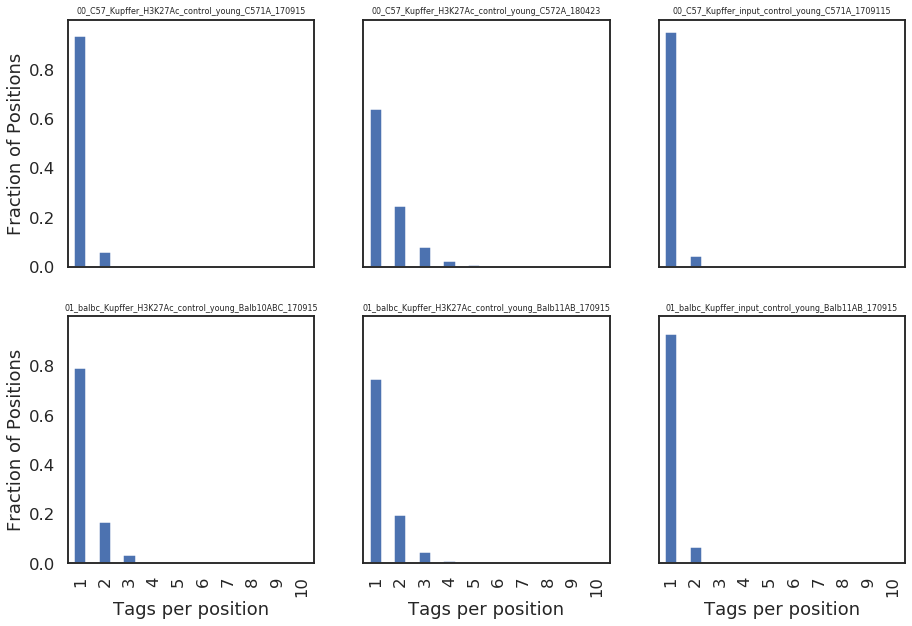

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|


In [7]:
# makeMultiWigHub.pl hrb_strains_h3k27ac_control_young mm10 -force -color \
# 77,175,74 77,175,74 77,175,74 \
# 55,126,184 55,126,184 55,126,184 \
# 228,26,28 228,26,28 228,26,28 \
# -d /gpfs/data01/glasslab/home/h1bennet/strains/data/H3K27Ac/control/*

 Based on the browser tracks and the qc for these samples this experiment will probably need to be redone.

# Find peaks

In [8]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./peak_files/ ]; then mkdir ./peak_files; fi

In [9]:
# set input directory
# inputdir = "00_mouse_MPSIIIAhet_M_P240_NeuN_input_2_AL_20191122_CCAACA"

with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        if '00_C57' in tagdir:
            inputdir='00_C57_Kupffer_input_control_young_C571A_1709115'
        elif '01_balb' in tagdir:
            inputdir='01_balbc_Kupffer_input_control_young_Balb11AB_170915'
        elif '02_aj' in tagdir:
            inputdir='02_aj_Kupffer_input_control_young_AJ11AB_161208'
        
        find_peaks_fw = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir,
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_fixedwidth_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-i', dataDirectory + '/' + inputdir, '-region',
                          '-size 1000 -minDist 2500',
                          '-o',
                          workingDirectory + '/peak_files/' + tagdir + '_variablewidth_peaks.tsv',
                          '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_fw))
        f.write(' '.join(find_peaks))

In [10]:
peak_stats={}

for td in np.sort(os.listdir('./peak_files/')):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [13]:
df.loc[df.index.str.contains('variablewidth')]

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
00_C57_Kupffer_H3K27Ac_control_young_C571A_170915_variablewidth_peaks.tsv,19914.0,46.36,476.0,0.0,5.0
00_C57_Kupffer_H3K27Ac_control_young_C572A_180423_variablewidth_peaks.tsv,18250.0,45.51,563.0,0.0,4.0
00_C57_Kupffer_input_control_young_C571A_1709115_variablewidth_peaks.tsv,0.0,0.00,0.0,0.0,0.0
01_balbc_Kupffer_H3K27Ac_control_young_Balb10ABC_170915_variablewidth_peaks.tsv,20943.0,46.08,522.0,0.0,1.0
01_balbc_Kupffer_H3K27Ac_control_young_Balb11AB_170915_variablewidth_peaks.tsv,18774.0,37.74,564.0,0.0,4.0
01_balbc_Kupffer_input_control_young_Balb11AB_170915_variablewidth_peaks.tsv,0.0,0.00,0.0,0.0,0.0
02_aj_Kupffer_H3K27Ac_control_young_AJ10ABC_161208_variablewidth_peaks.tsv,19662.0,44.96,632.0,0.0,4.0
02_aj_Kupffer_H3K27Ac_control_young_AJ11AB_161208_variablewidth_peaks.tsv,18461.0,44.06,671.0,0.0,4.0
02_aj_Kupffer_input_control_young_AJ11AB_161208_variablewidth_peaks.tsv,0.0,0.00,0.0,0.0,0.0


Happily enough these IP efficiencies look pretty similar across all the samples!

### Write to files

In [12]:
df.loc[df.index.str.contains('variable'), :].to_csv('./variablewidth_peak_table.txt', sep='\t')
df.loc[df.index.str.contains('fixed'), :].to_csv('./fixedwidth_peak_table.txt', sep='\t') 